# 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import re
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
plt.rcParams['font.family'] = 'NanumGothic'


# 데이터 로드

In [2]:
train_data=pd.read_csv('./data/train.csv')
test_data=pd.read_csv('./data/test.csv')

# 데이터 전처리
#### 의미 없는 컬럼 제거 및 점심 및 저녁 메뉴 밥, 국, 메인으로 분리 
#### 밥의 경우 여러 종류의 밥이 존재 -> 의미가 없다고 생각하고 모두 밥으로 단일화

In [3]:
train_data.drop('조식메뉴',axis=1,inplace=True)
test_data.drop('조식메뉴',axis=1,inplace=True)

In [4]:
train_data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식메뉴            1205 non-null   object 
 8   석식메뉴            1205 non-null   object 
 9   중식계             1205 non-null   float64
 10  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 103.7+ KB


<AxesSubplot:>

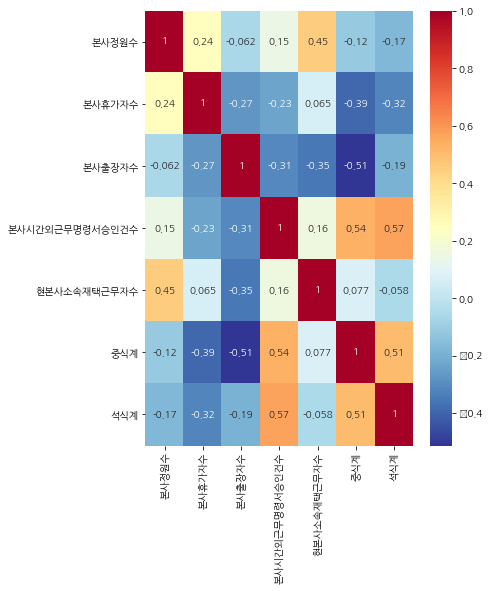

In [6]:
data_corr = train_data.corr()
plt.figure(figsize=(6,8))
sns.heatmap(data_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r'  # Red, Yellow, Blue 색상으로 표시
              )

In [7]:
# 중식계와 석식계간 다소 상관관계가 존재하는 것을 확인할 수 있음
# 중식계&석식계는 본사시간외 근무명령승인건수와 다소 상관관계가 있는 것을 확인 할 수 있다.
# 중식계의 경우 본사시간외 근무명령승인건수와 상관관계를 갖는 것이 특이!

In [8]:
train_data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [9]:
# 중식메뉴와 석식메뉴의 경우 식단으로 구성되어 있어 하나씩 구분해서 밥, 국, 메인과 같은 컬럼으로 세분화

In [10]:
train_lunch=[]
train_dinner=[]
for i in train_data['중식메뉴']:
    i=re.sub('\([^)]+\)','',i).replace('  ',' ')
    train_lunch.append(i)
    
for i in train_data['석식메뉴']:
    i=re.sub('\([^)]+\)','',i).replace('  ',' ')
    train_dinner.append(i)

In [11]:
test_lunch=[]
test_dinner=[]
for i in test_data['중식메뉴']:
    i=re.sub('\([^)]+\)','',i).replace('  ',' ')
    test_lunch.append(i)
    
for i in test_data['석식메뉴']:
    i=re.sub('\([^)]+\)','',i).replace('  ',' ')
    test_dinner.append(i)

In [12]:
# 밥의 경우 쌀밥, 현미밥, 흑미밥, 수수밥, 귀리밥, 찰현미밥, 오곡밥과 이외의 것으로 구성된다.
# 쌀밥, 현미밥, 흑미밥, 수수밥, 귀리밥, 찰현미밥, 오곡밥의 경우 밥으로 단일처리를 실행

In [13]:
train_lunch_=[]
for i in range(len(train_data)):
    li_=[]
    li=train_lunch[i].split( )
    for j in li:
        if '쌀밥' in j:
            li_.append('밥')
        elif '현미밥' in j:
            li_.append('밥')
        elif '흑미밥' in j:
            li_.append('밥')
        elif '수수밥' in j:
            li_.append('밥')
        elif '귀리밥' in j:
            li_.append('밥')
        elif '찰현미밥' in j:
            li_.append('밥')
        elif '오곡밥' in j:
            li_.append('밥')
        else:
            li_.append(j)
    train_lunch_.append(li_)

In [14]:
train_dinner_=[]
for i in range(len(train_data)):
    li_=[]
    li=train_dinner[i].split( )
    for j in li:
        if '쌀밥' in j:
            li_.append('밥')
        elif '현미밥' in j:
            li_.append('밥')
        elif '흑미밥' in j:
            li_.append('밥')
        elif '수수밥' in j:
            li_.append('밥')
        elif '귀리밥' in j:
            li_.append('밥')
        elif '찰현미밥' in j:
            li_.append('밥')
        elif '오곡밥' in j:
            li_.append('밥')
        else:
            li_.append(j)
    train_dinner_.append(li_)

In [15]:
test_lunch_=[]
for i in range(len(test_data)):
    li_=[]
    li=test_lunch[i].split( )
    for j in li:
        if '쌀밥' in j:
            li_.append('밥')
        elif '현미밥' in j:
            li_.append('밥')
        elif '흑미밥' in j:
            li_.append('밥')
        elif '수수밥' in j:
            li_.append('밥')
        elif '귀리밥' in j:
            li_.append('밥')
        elif '찰현미밥' in j:
            li_.append('밥')
        elif '오곡밥' in j:
            li_.append('밥')
        else:
            li_.append(j)
    test_lunch_.append(li_)

In [16]:
test_dinner_=[]
for i in range(len(test_data)):
    li_=[]
    li=test_dinner[i].split( )
    for j in li:
        if '쌀밥' in j:
            li_.append('밥')
        elif '현미밥' in j:
            li_.append('밥')
        elif '흑미밥' in j:
            li_.append('밥')
        elif '수수밥' in j:
            li_.append('밥')
        elif '귀리밥' in j:
            li_.append('밥')
        elif '찰현미밥' in j:
            li_.append('밥')
        elif '오곡밥' in j:
            li_.append('밥')
        elif '오곡밥' in j:
            li_.append('밥')
        else:
            li_.append(j)
    test_dinner_.append(li_)

In [17]:
train_lunch_df=pd.DataFrame(train_lunch_)
test_lunch_df=pd.DataFrame(test_lunch_)

train_dinner_df=pd.DataFrame(train_dinner_)
test_dinner_df=pd.DataFrame(test_dinner_)

In [18]:
train_lunch_df = train_lunch_df.rename(columns={0: '밥', 1: '국',2:'메인'})
test_lunch_df = test_lunch_df.rename(columns={0: '밥', 1: '국',2:'메인'})

train_dinner_df = train_dinner_df.rename(columns={0: '밥', 1: '국',2:'메인'})
test_dinner_df = test_dinner_df.rename(columns={0: '밥', 1: '국',2:'메인'})

In [19]:
train_lunch_df=train_lunch_df.iloc[:,:3]
test_lunch_df=test_lunch_df.iloc[:,:3]

train_dinner_df=train_dinner_df.iloc[:,:3]
test_dinner_df=test_dinner_df.iloc[:,:3]

# 밥, 국, 메인 컬럼의 값들을 카테고리화

In [20]:
cat_features = ['밥','국','메인']
for i in enumerate (cat_features):
    ca = i[1]
    train_lunch_df[ca] = train_lunch_df[ca].astype('category') 

In [21]:
cat_features = ['밥','국','메인']
for i in enumerate (cat_features):
    ca = i[1]
    test_lunch_df[ca] = test_lunch_df[ca].astype('category') 

In [22]:
cat_features = ['밥','국','메인']
for i in enumerate (cat_features):
    ca = i[1]
    train_dinner_df[ca] = train_dinner_df[ca].astype('category') 

In [23]:
cat_features = ['밥','국','메인']
for i in enumerate (cat_features):
    ca = i[1]
    test_dinner_df[ca] = test_dinner_df[ca].astype('category') 

# 컬럼 추가 제거

In [24]:
train_lunch=pd.concat([train_data,train_lunch_df],axis=1)
test_lunch=pd.concat([test_data,test_lunch_df],axis=1)

In [25]:
train_dinner=pd.concat([train_data,train_dinner_df],axis=1)
test_dinner=pd.concat([test_data,test_dinner_df],axis=1)

In [26]:
train_lunch=train_lunch[['일자','요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','밥','국','메인','중식계']]

In [27]:
test_lunch=test_lunch[['일자','요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','밥','국','메인']]

In [28]:
train_dinner=train_dinner[['일자','요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','밥','국','메인','중식계','석식계']]

In [29]:
test_dinner=test_dinner[['일자','요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','밥','국','메인']]

In [35]:
train_lunch.to_csv("train_lunch.csv")
test_lunch.to_csv("test_lunch.csv")

In [36]:
train_dinner.to_csv("train_dinner.csv")
test_dinner.to_csv("test_dinner.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   일자              1205 non-null   object  
 1   요일              1205 non-null   object  
 2   본사정원수           1205 non-null   int64   
 3   본사휴가자수          1205 non-null   int64   
 4   본사출장자수          1205 non-null   int64   
 5   본사시간외근무명령서승인건수  1205 non-null   int64   
 6   현본사소속재택근무자수     1205 non-null   float64 
 7   밥               1201 non-null   category
 8   국               1169 non-null   category
 9   메인              1169 non-null   category
 10  중식계             1205 non-null   float64 
 11  석식계             1205 non-null   float64 
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 132.4+ KB
